# LinearRegression

### Introducción

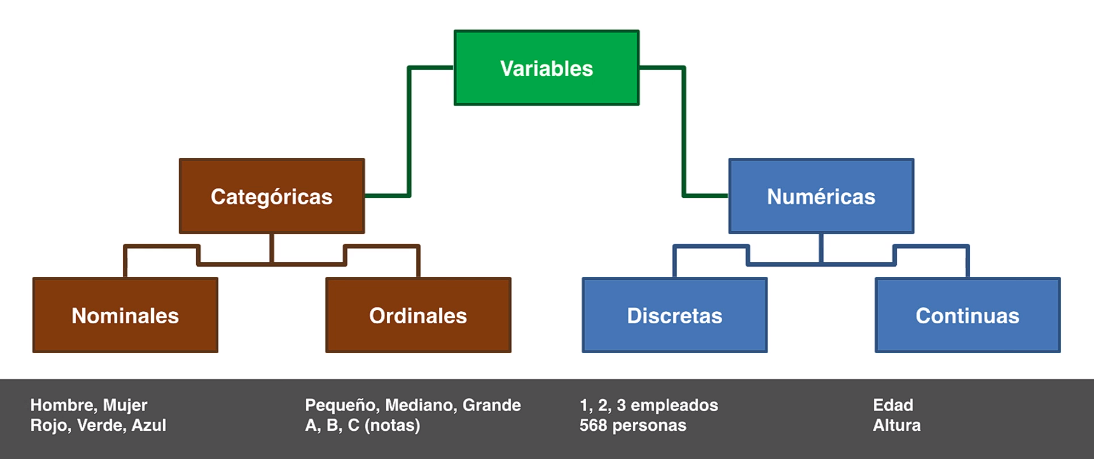

<p style ="text-align: justify;">
En los algoritmos de regresión existen dos tipos de variables <b>Categóricas</b> y <b>Numéricas</b>, siendo las categoricas las representaciones en formato texto <b>['String','Char']</b> y las numericas que son <b>['Integer', 'Float']</b>, sin embargo estas variables tienen dos subdiviciones cada una.<br>
</p>
<p style ="text-align: justify;">
Las variables categóricas se dividen en <b>Nominales</b>, siendo estas un conjunto de datos que no tienen relaciones entre sí, en el sentido de que no se puede representar cual dato es mayor que o menor que otro, no son datos comparables entre sí. Por otro lado están los <b>Ordinales</b>, y como su nombre los dice son datos ordinarios que si se puede cuantificar una diferencia entre ellos o son comparables entre sí.
</p>
<p style ="text-align: justify;">
Por otro lado en las variables numéricas se dividen en <b>Discretas</b>, siendo estas una representación numerica de una cantidad de objetos que se hayan guardado en el conjunto de datos. Por el contrario tenemos las <b>Continuas</b>, las cuales especifican los datos numericos que por lo general son caracteristicas de algún objeto, que además utiliza unidades de medida tales como (metros, segundos, volumen)
</p>

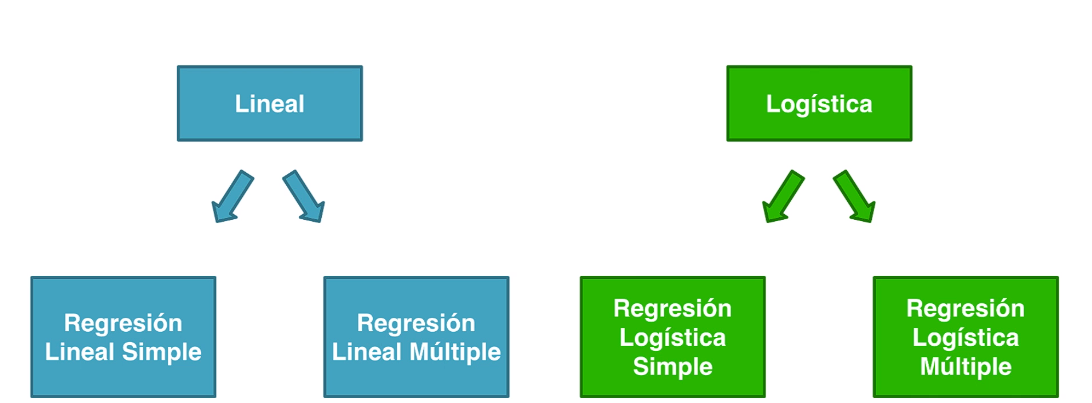

<p style ="text-align: justify;">
Existen dos tipos de regresión, <b>Lineal</b> y <b>Logística</b>, estas dos regresiones cuentan con su respectiva <b>Regresión Simple</b> y su <b>Regresión Multiple</b>, que representan la predicción de datos con una sola caractersitica o feature y con multiples caractersiticas o features, respectivamente
</p>

### Regresión Lineal Simple

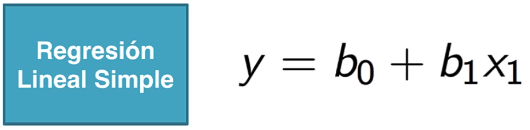

In [ ]:
# Importando librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importando dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [ ]:
# Dividiendo Conjutno de datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [ ]:
# Creando Modelo de Regresión Lineal Simple
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

In [ ]:
# Prediciendo el conjutno de test
y_pred = regression.predict(X_test)
y_pred

In [ ]:
# Visualización de resukltados de entrenamiento
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train,regression.predict(X_train), color='blue')
plt.title('Sueldo vs Años de experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo (en $)')
plt.show()

In [ ]:
# Visualización de resukltados de Testing
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train,regression.predict(X_train), color='blue')
plt.title('Sueldo vs Años de experiencia (Conjunto de testeo)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo (en $)')
plt.show()

### Regresión Lineal Multiple

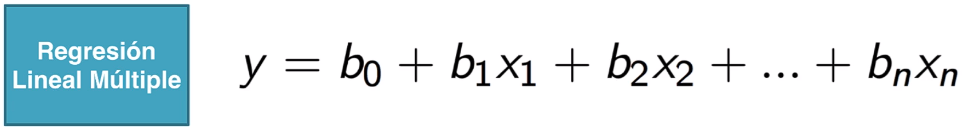

#### Procesando datos 

In [1]:
# importando Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\gaels\AppData\Local\Temp\ipykernel_6616\4014948518.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Obteniendo dataset
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Separando datos de entrada y de salida
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

In [ ]:
y

In [5]:
# Codificando datos categóricos
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X[:,3] = LE.fit_transform(X[:,3])
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'),[3])],remainder='passthrough')

X = np.array(ct.fit_transform(X), dtype=np.int64)

In [ ]:
print(X)

In [6]:
# Eliminando primera columna de variables Dummy para evitar la trampa de datos
X = X[:,1:]

In [ ]:
X

In [7]:
# Dividiendo datos de test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


#### Aplicando Modelo De Regresión Lineal Multiple

In [8]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

#### Mejorando la predicción al modelo

In [9]:
# Preparando los datos de entrada para obtener el P-valor de los datos
import statsmodels.api as sm
X = np.append(arr=np.ones((50,1)).astype(int), values=X, axis=1)

In [10]:
# Aplicando algoritmo de regresión hacía atrás

# Inicializando las variables optimas forzando columnas
X_opt = X[:,[0,1,2,3,4,5]].tolist()

# Inicializando el nivel de significación
sl = 0.05

regression_OLS = sm.OLS(y,X_opt).fit()


In [ ]:
X_opt

In [11]:
# Obteniendo información importante del conjunto de datos, en especifico el P>|t|
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           1.34e-27
Time:                        23:50:24   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.855      7.281      0.000    3.63e+04     6.4e+04
x1           198.7542   3371.026      0.059      0.953   -6595.103    6992.611
x2           -42.0063   3256.058     -0.013      0.990   -6604.161    6520.148
x3             0.8060      0.046     17.368      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.783   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.267
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:

# Siguiendo reglas de eliminación hacía atrás
vali = False
while not vali:
    # Obtenemos el valor y el indice del valor más grande de los P-valores del modelo
    p_values_max_index = np.argmax(regression_OLS.pvalues)
    p_values_max_value = max(regression_OLS.pvalues)
    # Si el P-valor más grande es serior al nivel de significación eliminamos toda la columna y volvemos a ajustar el modelo
    if p_values_max_value > sl:
        X_opt = np.delete(X_opt, p_values_max_index, axis=1)
        regression_OLS = sm.OLS(y,X_opt).fit()
    # Si llega un punto en que los P-valores son infreiores al nivel de significación entonces damos por terminado el ajuste del modelo
    else:
        vali = True

    

In [13]:
# Mostramos Resultados Finales
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           3.50e-32
Time:                        23:50:44   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.900     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.538
Skew:                          -0.911   Prob(JB):                     9.43e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regresión Polinomica

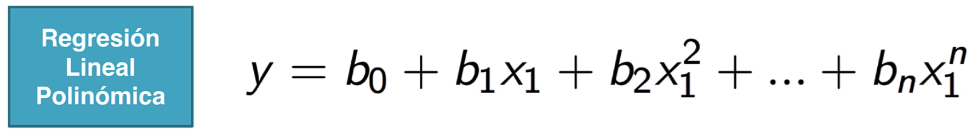

#### Procesando Datos

In [37]:
# importando librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Obteniendo Conjunto de datos
dataset = pd.read_csv('Position_Salaries.csv')


In [39]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [40]:
# Dividiendo el conjutno de datos
X = dataset.iloc[:,-2:-1]
y = dataset.iloc[:,-1]

In [10]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

#### Implementando Regresión Lineal Polinomica

In [88]:
# Transformando los datos de X para utilizarlos en una función polinomica
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
# Creando el modelo de regresión con los datos transformados
poly_reg = LinearRegression()
poly_reg.fit(X_poly,y)

LinearRegression()

In [89]:
X_grid = np.arange(min(X['Level']), max(X['Level']),0.1)
X_grid = X_grid.reshape(len(X_grid),1)

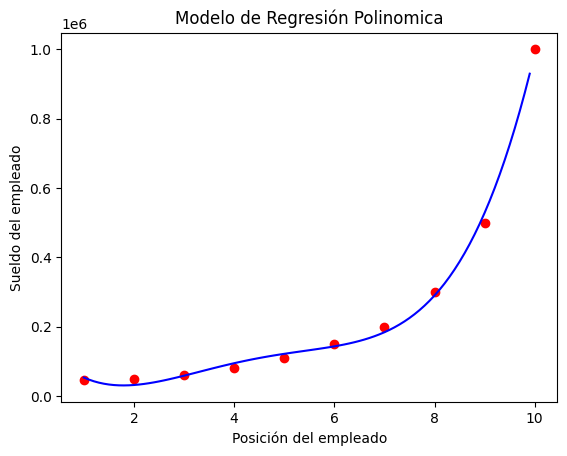

In [90]:
# Visualizando datos
plt.scatter(X,y, color='red')
plt.plot(X_grid, poly_reg.predict(poly.fit_transform(X_grid)), color='blue')
plt.title('Modelo de Regresión Polinomica')
plt.xlabel('Posición del empleado')
plt.ylabel('Sueldo del empleado')
plt.show()

In [91]:
poly_reg.predict(poly.fit_transform([[6.5]]))

array([158862.45265155])

### Plantilla de Regresión Polinomica

In [ ]:
# importando librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importar dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

# Dividir el dataset en test y train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Variables categoricas
from sklearn.preprocessing import LabelEncoder
labelencorer = LabelEncoder()
X.iloc[:,0] = labelencorer.fit_transform(X.iloc[:,0])

# Transfomrmación a Variables Dummy
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'),[0])],remainder='passthrough')

X = np.array(ct.fit_transform(X), dtype=np.int64)

# Escalado de variables estandarizadas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creación de modelo para Polynomial
# Transformando los datos de X para utilizarlos en una función polinomica
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
# Creando el modelo de regresión con los datos transformados
poly_reg = LinearRegression()
poly_reg.fit(X_poly,y)

# Creación de modelo de regresión Simple o Multiple
regression = LinearRegression()
regression.fit(X,y)

y_pred = regression.predict(6.5)

# Muestreo de datos
plt.scatter(X,y, color='red')
plt.plot(X,y,color='blue')
plt.title('Titulo')
plt.xlabel('Titulo en X (datos de entrada)')
plt.ylabel('Titulo de y (datos de salida)')

